In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (299, 13)


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [5]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# Display the Missing Values

print(data.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [7]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

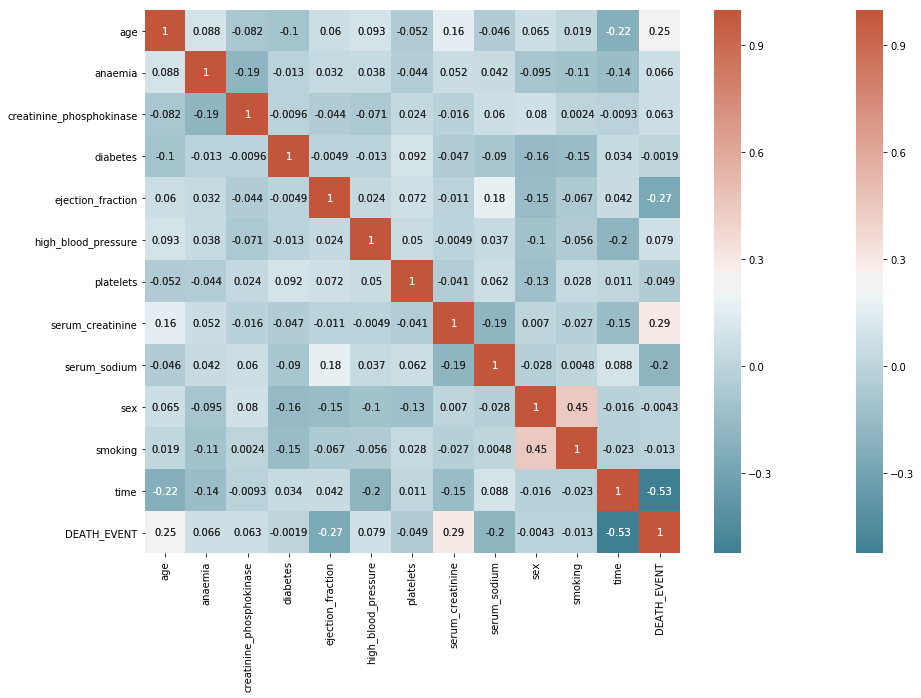

In [8]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

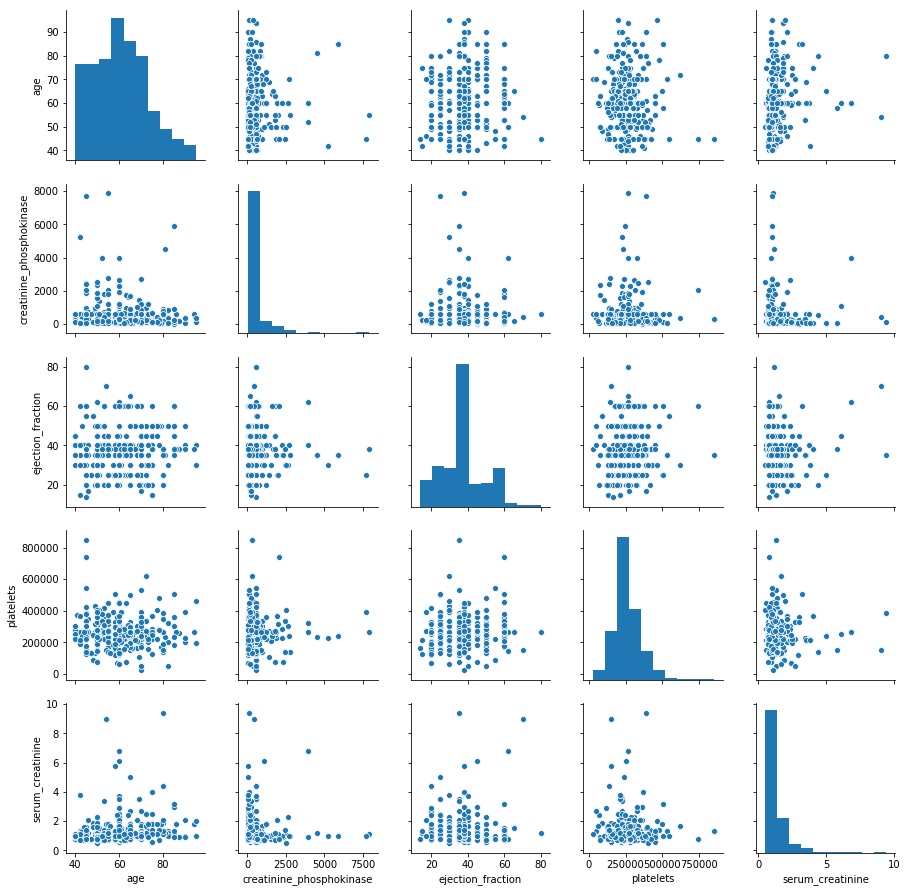

In [9]:
subData = data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine']]
sns.pairplot(subData)

In [10]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['DEATH_EVENT']==1]
pos_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


In [11]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['DEATH_EVENT']==0]       
neg_data.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,58.761906,0.408867,540.054187,0.418719,40.266010,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901,0.0
std,10.637890,0.492840,753.799572,0.494569,10.859963,0.469579,97531.202283,0.654083,3.982923,0.478071,0.469579,67.742872,0.0
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,12.000000,0.0
25%,50.000000,0.000000,109.000000,0.000000,35.000000,0.000000,219500.000000,0.900000,135.500000,0.000000,0.000000,95.000000,0.0
50%,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263000.000000,1.000000,137.000000,1.000000,0.000000,172.000000,0.0
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.200000,140.000000,1.000000,1.000000,213.000000,0.0
max,90.000000,1.000000,5209.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000,285.000000,0.0


In [12]:
print("(Positive Patients serum_creatinine): " + str(pos_data['serum_creatinine'].mean()))
print("(Negative Patients serum_creatinine): " + str(neg_data['serum_creatinine'].mean()))

(Positive Patients serum_creatinine): 1.8358333333333332
(Negative Patients serum_creatinine): 1.184876847290641


In [13]:
print("(Positive Patients serum_sodium): " + str(pos_data['serum_sodium'].mean()))
print("(Negative Patients serum_sodium): " + str(neg_data['serum_sodium'].mean()))

(Positive Patients serum_sodium): 135.375
(Negative Patients serum_sodium): 137.2167487684729


In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODEL 1 : LOGISTIC_REGRESSION

In [17]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

In [19]:
model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 


C:\Users\aa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

   micro avg       0.88      0.88      0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



In [21]:
from sklearn import metrics
model1_accu = print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred1)*100))

Accuracy = 88.333


# MODEL 2 : K-NN (K-NEAREST NEIGHBORS) 

In [22]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.56      0.36      0.43        14

   micro avg       0.78      0.78      0.78        60
   macro avg       0.69      0.64      0.65        60
weighted avg       0.76      0.78      0.77        60



In [25]:
from sklearn import metrics
model2_accu = print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred2)*100))

Accuracy = 78.333


# MODEL 3 : SVM (SUPPORT VECTOR MACHINE)

In [26]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

In [27]:
model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.83      0.71      0.77        14

   micro avg       0.90      0.90      0.90        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.90      0.90      0.90        60



In [29]:
from sklearn import metrics
model3_accu = print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred3)*100))

Accuracy = 90.000


# MODEL 4 : NAIVE BAYES CLASSIFIER         

In [30]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB                 

In [31]:
model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        46
           1       0.75      0.43      0.55        14

   micro avg       0.83      0.83      0.83        60
   macro avg       0.80      0.69      0.72        60
weighted avg       0.82      0.83      0.82        60



In [33]:
from sklearn import metrics
model4_accu = print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred4)*100))

Accuracy = 83.333


# MODEL 5 : DECISION TREES     

In [34]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

In [35]:
model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [36]:
y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.55      0.79      0.65        14

   micro avg       0.80      0.80      0.80        60
   macro avg       0.74      0.80      0.75        60
weighted avg       0.84      0.80      0.81        60



In [37]:
from sklearn import metrics
model5_accu = print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred5)*100))

Accuracy = 80.000


# MODEL 6 : RANDOM FOREST     

In [38]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier


In [39]:
model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

C:\Users\aa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy     

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        46
           1       0.89      0.57      0.70        14

   micro avg       0.88      0.88      0.88        60
   macro avg       0.89      0.77      0.81        60
weighted avg       0.88      0.88      0.87        60



In [41]:
from sklearn import metrics
model6_accu = print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, y_pred6)*100))

Accuracy = 88.333


# ACCURACY ANALYSIS     

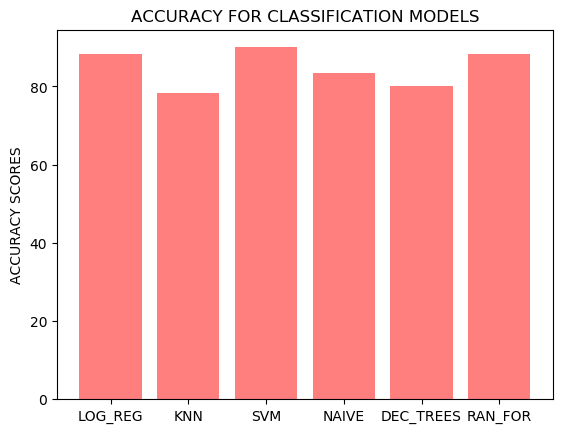

In [43]:
import matplotlib.pyplot as plt; plt .rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LOG_REG','KNN','SVM','NAIVE','DEC_TREES','RAN_FOR')             
y_pos = np.arange(len(objects))
accuracy = [88.33,78.33,90.00,83.33,80.00,88.33]

plt.bar(y_pos, accuracy, align='center', alpha=0.5, color="RED")
plt.xticks(y_pos,objects)
plt.ylabel('ACCURACY SCORES')                                         
plt.title('ACCURACY FOR CLASSIFICATION MODELS')
plt.show()